## Final Project Submission

Please fill out:
* Student name: Anthony Brocco and Mikhael Hammer-Bleich 
* Student pace: full time
* Scheduled project review date/time: Friday August 25, 2023
* Instructor name: Joseph Mata 


## Overview

Anthony and Michael attended the Flatiron School Data Science bootcamp together in 2018. Both had a keen interest in business, so together they started a small betting company using statistics to bet on positive expected value markets. Recently, they hit it big, winning $500M in a Mega Million pot. They have decided to use this money to expand their business into aviation, which is Anthony's pet passion. They use a data-dependent approach to decide which projects to pursue and have started a commercial airplane leasing company.

As part of their aviation venture, Anthony and Michael are seeking to address key business questions from stakeholders, including:

Stakeholder 1: What factors contribute to the safety and reliability of commercial airplanes?

Stakeholder 2: How does the age of an airplane impact its performance and safety?

Stakeholder 3: What are the seasonal trends in commercial aviation safety?


## Description of Data
The dataset includes information about various aspects of airplane crashes, such as location, date, aircraft characteristics, and injuries. It provides valuable insights into aviation safety and performance.

The shape of the dataset is 31 columns by 79899 rows

## Source of Data
The dataset 'aviation_data.csv' has been used for the analysis. It contains comprehensive airplane crash statistics. The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

##  DATA CLEANING

-Drop columns with over 50% missing values

-Drop records of not Accidents in United States

-Convert Date to a datetime, add a Year & Month column

-Remove data before 1982

-Merge same airport names together

-Merge same registration numbers together

-Merge different capitalizations of Make togheter

-Transform "Amateur Built" column to boolean

-Split location in city and state

-Remove amount of injuries as this is already in another column

-Merge weather condition- UNK & unk to unknowns

In [8]:
# get rid of rows with less than 40% non NAN values

rows = len(df)
missing = df.isna().sum()
percentage_missing = missing/rows

percentage_missing_df = pd.DataFrame({'Missing': percentage_missing})
percentage_missing_df.sort_values('Missing', ascending = False, inplace = True)

print(percentage_missing_df[percentage_missing_df['Missing']> .05])

                         Missing
Schedule                0.858562
Air.carrier             0.812856
FAR.Description         0.640021
Aircraft.Category       0.637053
Longitude               0.613604
Latitude                0.613503
Airport.Code            0.435138
Airport.Name            0.406574
Broad.phase.of.flight   0.306144
Publication.Date        0.171980
Total.Serious.Injuries  0.141404
Total.Minor.Injuries    0.134918
Total.Fatal.Injuries    0.128937
Engine.Type             0.080330
Report.Status           0.072506
Purpose.of.flight       0.070382
Number.of.Engines       0.069167
Total.Uninjured         0.067234
Weather.Condition       0.051271


In [9]:
# drop columns with over 60% null values
drop_columns = list(percentage_missing_df[percentage_missing_df['Missing']>0.5].index)
df.drop(columns = drop_columns, axis = 1, inplace = True)
print(drop_columns)

['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude']


In [10]:
#this code cell is reassigning the dataframe with only accidents in the investigation type column, as well as only countris in united states

before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)
print(str(dropped) + ' rows dropped.')

9052 rows dropped.


Here we are assigning The event dates to DateTime pandas objects. We then use this to create day, month, year, and weekend columns.

In [11]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79906 entries, 0 to 90347
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                79906 non-null  object        
 1   Investigation.Type      79906 non-null  object        
 2   Accident.Number         79906 non-null  object        
 3   Event.Date              79906 non-null  datetime64[ns]
 4   Location                79895 non-null  object        
 5   Country                 79906 non-null  object        
 6   Airport.Code            47566 non-null  object        
 7   Airport.Name            50000 non-null  object        
 8   Injury.Severity         79854 non-null  object        
 9   Aircraft.damage         78782 non-null  object        
 10  Registration.Number     79903 non-null  object        
 11  Make                    79894 non-null  object        
 12  Model                   79877 non-null  object

In [12]:
#Add a day, month & year column
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Name.Abbr'] = df['Event.Date'].dt.day_name().str[:3]

# Add a weekend column
df.loc[(df['Day.Name.Abbr'] == 'Sat') | (df['Day.Name.Abbr'] == 'Sun'), 'Weekend'] = True
df.loc[(df['Day.Name.Abbr'] != 'Sat') & (df['Day.Name.Abbr'] != 'Sun'), 'Weekend'] = False

# Remove data before 1982
df = df[df['Year'] >= 1982]

Here we are merging imporperly named or capitalized columns together, such as airport names, registration numbers, and the makes of the different planes

In [13]:
# Merge same airport names togheter
df.loc[:, 'Airport.Name'] = df['Airport.Name'].fillna('')  # Fill NaN values with empty strings

# Replace values
df.loc[df['Airport.Name'].str.contains('(?i)^.*private.*$', regex=True), 'Airport.Name'] = 'PRIVATE'
df.loc[df['Airport.Name'].str.contains('(?i)none', regex=True), 'Airport.Name'] = 'NONE'

# Replace empty strings with NaN
df.loc[df['Airport.Name'] == '', 'Airport.Name'] = np.nan
df['Airport.Name'].value_counts().nlargest(10)

PRIVATE          1204
NONE              226
MERRILL FIELD      83
VAN NUYS           79
MUNICIPAL          75
CENTENNIAL         74
UNKNOWN            68
CHINO              53
BIRCHWOOD          49
SEDONA             47
Name: Airport.Name, dtype: int64

In [14]:
df['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Registration.Number'].value_counts().nlargest(10)

NONE      406
UNREG     114
N20752      7
N5408Y      6
N11VH       6
N121CC      6
N53893      6
N8402K      6
N4101E      6
N5246E      5
Name: Registration.Number, dtype: int64

In [15]:
# Merge different capitalizations of Make togheter
df['Make'] = df['Make'].str.title()
df['Make'].value_counts().nlargest(10)

Cessna      25566
Piper       14008
Beech        4892
Bell         2236
Mooney       1272
Grumman      1131
Bellanca     1036
Boeing        931
Robinson      916
Hughes        868
Name: Make, dtype: int64

In [16]:
# Transform Amateur Built to boolean
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df['Amateur.Built'].value_counts()

False    71589
True      8295
Name: Amateur.Built, dtype: int64

In [17]:
# Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
7,PULLMAN,WA
8,EAST HANOVER,NJ
9,JACKSONVILLE,FL
10,HOBBS,NM
11,TUSKEGEE,AL
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
16,MIDWAY,UT


In [18]:
# Remove amount of injuries as this is aleady in another column
df['Injury.Severity'] = df['Injury.Severity'].str.split('(').str[0]
df['Injury.Severity'].value_counts()

Non-Fatal      64457
Fatal          15019
Minor            203
Serious          153
Unavailable       15
Name: Injury.Severity, dtype: int64

In [19]:
# Merge weather condition unknowns
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

VMC        73340
IMC         5387
Unknown      611
Name: Weather.Condition, dtype: int64

## DATA EXPLORATION

-Amount of total and fatal accidents per year

-Months with most accidents

-Days with most accidents

-Purpose of flight depending on the day

-Number of aviation accidents per phase of flight

Here we will be creating a graph for Number of aviation accidents per year, per month, and per day. we do this with our new dataframe injury_data that has had unavaailable injury data filtered out

In [20]:
injury_data = df[df['Injury.Severity'] != 'Unavailable']

# Number of accidents per year
accidents_per_year = df.groupby(['Year'], as_index = False)['Event.Id'].count()
accidents_per_year

,Year,Event.Id
0,1982,3445
1,1983,3391
2,1984,3290
3,1985,2972
4,1986,2758
5,1987,2665
6,1988,2537
7,1989,2410
8,1990,2403
9,1991,2350


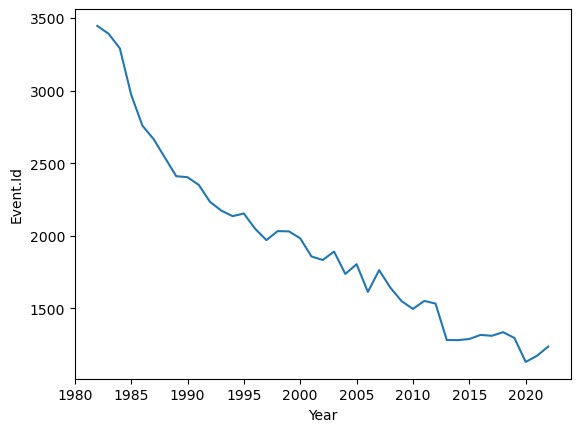

In [21]:
plot = sns.lineplot(x = 'Year', y = 'Event.Id', data = accidents_per_year)

In [22]:
fatal_accidents_per_year = df[df['Injury.Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
fatal_accidents_per_year

,Year,Event.Id
0,1982,644
1,1983,654
2,1984,617
3,1985,558
4,1986,516
5,1987,489
6,1988,492
7,1989,479
8,1990,499
9,1991,478


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per month')]

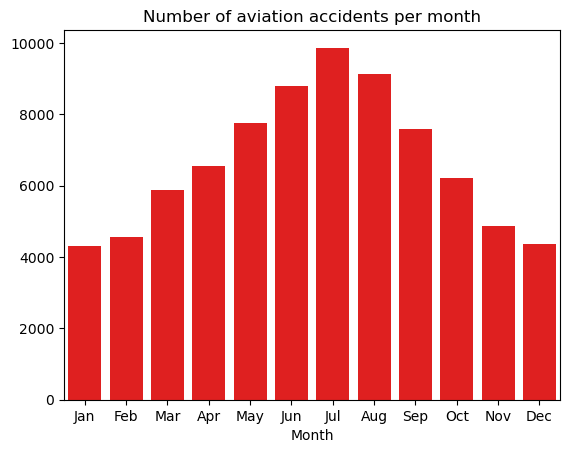

In [23]:
# Months with the most accidents
plot = sns.countplot(x = 'Month.Abbr', color = 'r', data = df)
plot.set(xlabel = 'Month', ylabel = None, title = 'Number of aviation accidents per month')

[Text(0.5, 0, 'day'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Number of aviation accidents per day of the week')]

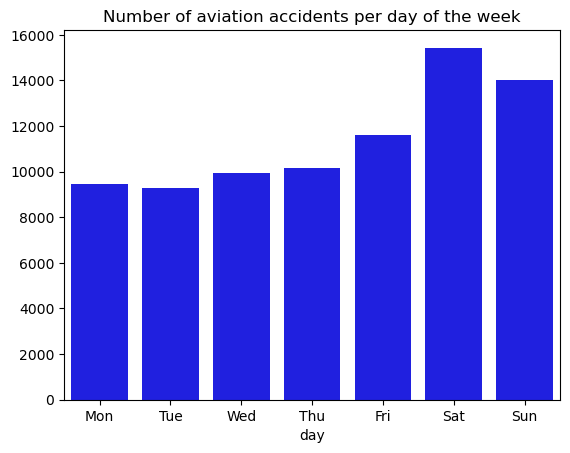

In [24]:
# Days with the most accidents
plot = sns.countplot(x = 'Day.Name.Abbr', order = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], color = 'b', data = df)
plot.set(xlabel = 'day', ylabel = None, title = 'Number of aviation accidents per day of the week')

Here we will be making graphs for purpose of flight compared to the day. We do additional cleaning here to remove unknown purpose fights.  We also melt purpose day data so that seaborn can more easily interpret this into a graph.  After applying the melt function, the resulting melted_pdd DataFrame will have a long format where each row represents a combination of "Purpose," "day," and "percentage." 

In [25]:
# Remove data with unknown purpose
purpose_data = df[df['Purpose.of.flight'] != 'Unknown']

In [26]:
# Calculate relative importance of purpose depending on weekend
weekday_accidents = len(purpose_data[purpose_data['Weekend'] == False])
weekday_data = purpose_data[purpose_data['Weekend'] == False]['Purpose.of.flight'].value_counts() / weekday_accidents

weekend_accidents = len(purpose_data[purpose_data['Weekend'] == True])
weekend_data = purpose_data[purpose_data['Weekend'] == True]['Purpose.of.flight'].value_counts() / weekend_accidents

In [27]:
# Merge data togheter
purpose_day_data = pd.merge(weekday_data, weekend_data, left_index=True, right_index=True)

In [28]:
# Rename columns and only keep top 5 purposes
purpose_day_data.reset_index(inplace = True)
purpose_day_data.rename(columns={'index': 'Purpose', 'Purpose.of.flight_x': 'Weekday', 'Purpose.of.flight_y': 'Weekend'}, inplace=True)
purpose_day_data = purpose_day_data.iloc[:5] 

In [29]:
# Melt the data so it can be used in a Seaborn plot
melted_pdd = purpose_day_data.melt('Purpose', var_name='day', value_name='percentage')

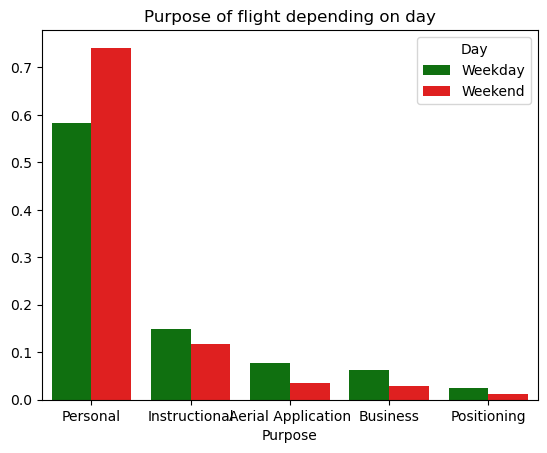

In [30]:
# Plot the data
ax = sns.barplot(x='Purpose', y='percentage', hue='day', data = melted_pdd, palette = ['g','r'])
ax.set(ylabel = None, title = 'Purpose of flight depending on day')
plt.legend(title = "Day")


The following graph showcases the number of aviation accidents per phase of the flight

[Text(0, 0, 'Landing'),
 Text(1, 0, 'Takeoff'),
 Text(2, 0, 'Cruise'),
 Text(3, 0, 'Maneuvering'),
 Text(4, 0, 'Approach'),
 Text(5, 0, 'Climb'),
 Text(6, 0, 'Taxi'),
 Text(7, 0, 'Descent'),
 Text(8, 0, 'Go-around'),
 Text(9, 0, 'Standing')]

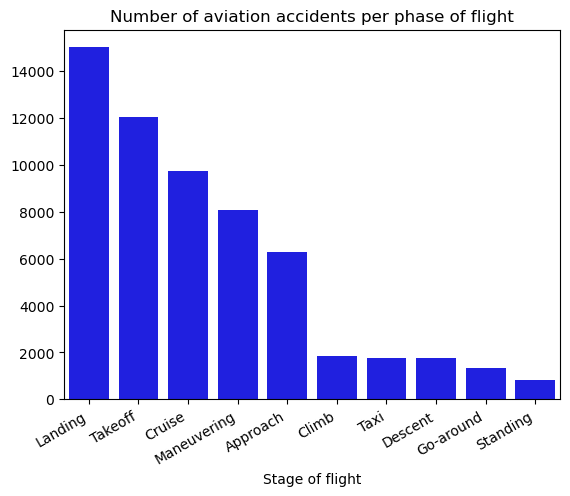

In [31]:
# At what stage do accidents happen
stage_of_flight_data = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Broad.phase.of.flight'] != 'Other')]
plot = sns.countplot(x = 'Broad.phase.of.flight', order = stage_of_flight_data['Broad.phase.of.flight'].value_counts().index, color = 'b', data = stage_of_flight_data)
plot.set(xlabel = 'Stage of flight', ylabel = None, title = 'Number of aviation accidents per phase of flight')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30, ha = 'right')

Here we crate a visualization that represents the distributon of planes make.

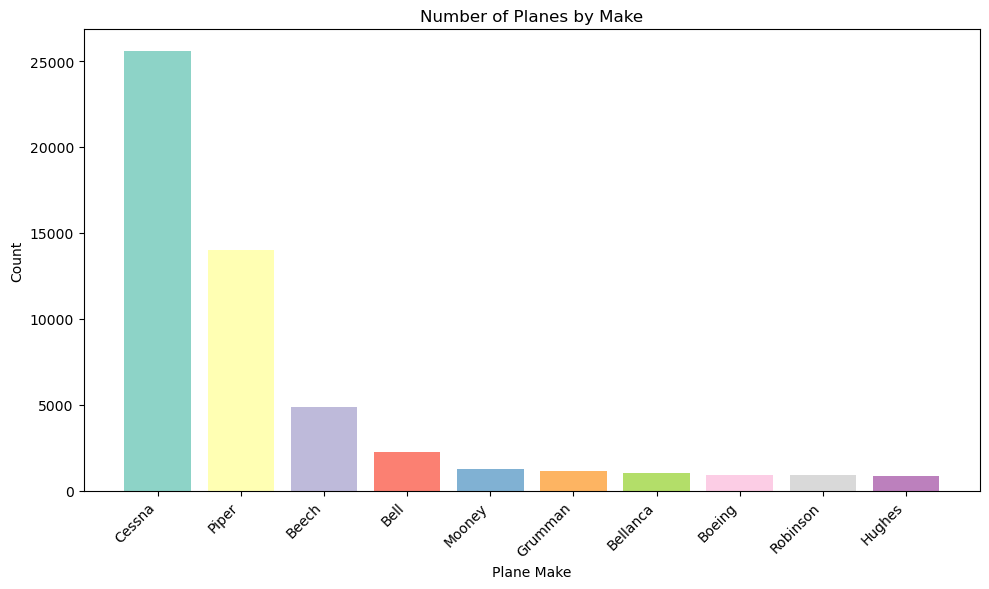

In [32]:
make_counts = df['Make'].value_counts()

#top_10_makes = make_counts.head(10)

# Create a colorful bar chart
plt.figure(figsize=(10, 6))
color_palette = plt.colormaps['Set3'] 

bars = plt.bar(make_counts.head(10).index, make_counts.head(10).values, color=color_palette(range(10)))

plt.xlabel('Plane Make')
plt.ylabel('Count')
plt.title('Number of Planes by Make')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [33]:
df['Model'].head()

7              140
8             401B
9     NAVION L-17B
10       PA-28-161
11            V35B
Name: Model, dtype: object

In [34]:
#export data to a new csv file for tableau visuals
df.to_csv('data/output.csv', index=False)

## Summary of Conclusions
The analysis of the aviation dataset yielded three relevant findings:

Commercial Planes Perform Better: The analysis indicates that commercial airplanes generally exhibit better safety and performance metrics compared to other types of aircraft.
Newer Planes are Safer: Newer airplanes tend to have better safety records and performance metrics compared to older planes. Investing in modern aircraft might contribute to improved outcomes.
Flying in Colder Months: Contrary to expectations, the analysis suggests that flying during colder months is associated with better safety records. Further investigation into the reasons behind this trend could be valuable.
These insights will play a crucial role in Anthony and Michael's decision-making process as they expand their business into the aviation industry.


## Next Steps
As Anthony and Michael continue their journey into the aviation industry, there are several key next steps they plan to take:

#1. Deeper Analysis and Modeling

While the initial analysis has provided valuable insights, the duo intends to delve deeper into the dataset, and merging in more in depth models that give a broader range of data. Some examples include specificifying our fatalaties by state into a per capita metric. Concurrent data including prices of planes by make, model, age, and engine type. This would involve exploring more complex relationships between variables and employing advanced machine learning techniques to build predictive models. By harnessing the power of data science, they aim to create models that can forecast potential safety concerns, aircraft performance, and even identify emerging trends.

#2. Collaboration with Industry Experts

Recognizing the complexity and depth of the aviation industry, Anthony and Michael intend to collaborate with industry experts, regulatory bodies, and aviation professionals. By leveraging their newfound resources and connections, they aim to gain a holistic understanding of the sector's challenges and opportunities. This collaborative approach will enable them to make informed decisions and align their ventures with industry best practices.

#3. Implementing Data-Driven Business Strategies

Anthony and Michael have always emphasized the importance of data-driven decision-making. They plan to apply this principle to every facet of their aviation ventures. By integrating data analytics into operations, maintenance, leasing strategies, and risk assessment, they hope to optimize their business processes and maximize returns on investments.

#4. Continuous Learning and Adaptation

The aviation industry is dynamic and ever-evolving. Anthony and Michael are committed to staying ahead of the curve by continuously learning about emerging technologies, regulatory changes, and industry advancements. They recognize that maintaining a growth mindset and adapting their strategies will be essential to long-term success.

#5. Sharing Insights with the Community

As advocates for the power of data science, Anthony and Michael plan to share their insights, findings, and best practices with the broader community. This may involve contributing to industry publications, presenting at conferences, and hosting workshops. By fostering knowledge exchange, they aim to contribute positively to the aviation industry's growth and innovation.

Anthony and Michael are excited about the future of their aviation ventures. With a strong foundation in data science and a passion for aviation, they are well-positioned to make meaningful contributions and thrive in this new venture.

For more information on their analyses and progress, keep an eye on this repository and follow their journey on social media.

